# Data Wrangling Project

# Introduction
The "We Rate Dogs" Twitter archive contains over 5000 tweets, which have been filtered to create the enhanced archive that forms the basis of this analysis. The goal of this project is to wrangle the data - gather, assess, and clean - into a tidy dataset, and then provide analyses and visualizations.

In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import matplotlib.pyplot as plt
import seaborn as sns
import re
import datetime
import os
import warnings
from bs4 import BeautifulSoup
%matplotlib inline

## 1.Data Gathering

### 1.1 Twitter archive gathering

In [2]:
# Read the csv file as pandas DataFrame
archive_df = pd.read_csv("twitter-archive-enhanced.csv")

### 1.2 image predictions gathering

In [3]:
# Download image_prediction file using requests
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
folder_name = url.split('/')[-1]
if not os.path.isfile(folder_name):
    with open(folder_name ,"wb") as file:
        file.write(response.content)
        
# Read image_prediction.tsv file as a pandas DataFrame
image_predictions_df = pd.read_csv("image-predictions.tsv" , sep= "\t")

### 1.3 Twitter API gathering

In [4]:
# Personal API keys, secrets, and tokens
consumer_key = "HIDDEN"
consumer_secret = "HIDDEN"
access_token = "HIDDEN"
access_secret = "HIDDEN"

In [5]:
# Tweepy query
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [6]:
# create tweet_json.txt file for the tweets' text data
errors =[]
if not os.path.isfile('tweet_json.txt'):
    with open('tweet_json.txt' , 'w') as file:
        for tweet_id in archive_df['tweet_id']:
            try:
                status = api.get_status(tweet_id , wait_on_rate_limit=True , wait_on_rate_limit_notify=True ,tweet_mode='extended')
                json.dump(status._json , file)
                file.write('\n')
            except Exception as e:
                errors.append(tweet_id)

In [7]:
# Create a list of tweets by reading the _json.txt file
tweet_list =[]
with open("tweet_json.txt", "r") as file:
    for line in file:
        tweet = json.loads(line)
        tweet_list.append(tweet)

In [8]:
# Create api_df from tweet_list
api_df = pd.DataFrame(tweet_list)
api_df = api_df[['id' , 'retweet_count', 'favorite_count']]

## 2. Data Assessing

### 2.1 Twitter archive  assessing

In [9]:
# View first 10 rows of archive_df
archive_df.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [10]:
# View columns information
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [11]:
# View descriptive statistics of numerical data
archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [12]:
# View 10 random rows of archive data
archive_df.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1436,697255105972801536,NaN,NaN,2016-02-10 03:05:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Charlie. He likes to kiss all the big mil...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697255105...,10,10,Charlie,None,None,None,None
90,874680097055178752,NaN,NaN,2017-06-13 17:29:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Cash. He hath acquired a stick. A very go...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/874680097...,12,10,Cash,None,None,None,None
250,845098359547420673,NaN,NaN,2017-03-24 02:22:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bungalo. She uses that ...,7.733088e+17,4.196984e+09,2016-09-06 23:56:05 +0000,https://twitter.com/dog_rates/status/773308824...,12,10,Bungalo,None,None,None,None
2236,668154635664932864,NaN,NaN,2015-11-21 19:50:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Fun dogs here. Top one clearly an athlete. Bot...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668154635...,9,10,None,None,None,None,None
907,757741869644341248,NaN,NaN,2016-07-26 00:58:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Leonard. He hides in bushes to escape ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/757741869...,10,10,Leonard,None,None,None,None
1701,680940246314430465,NaN,NaN,2015-12-27 02:36:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Alice. She's an idiot. 4/10 https://t....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680940246...,4,10,Alice,None,None,None,None
1071,740214038584557568,NaN,NaN,2016-06-07 16:09:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is getting incredibly frustrating. This i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/740214038...,10,10,getting,None,None,None,None
1195,717421804990701568,NaN,NaN,2016-04-05 18:41:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ebby. She's a Zimbabwean Feta. Embarra...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717421804...,9,10,Ebby,None,None,None,None
1595,686358356425093120,NaN,NaN,2016-01-11 01:25:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Heartwarming scene here. Son reuniting w fathe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686358356...,10,10,None,None,None,None,None
1833,676146341966438401,NaN,NaN,2015-12-13 21:07:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bert. He likes flowers. 10/10 https://...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676146341...,10,10,Bert,None,None,None,None


In [13]:
# View count of each name used
archive_df.name.value_counts()

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
          ... 
Todo         1
BeBe         1
Georgie      1
Barney       1
Jimbo        1
Name: name, Length: 957, dtype: int64

In [14]:
# View names start with lowercase letter
archive_df.loc[archive_df['name'].str.islower()].name.value_counts()

a               55
the              8
an               7
very             5
quite            4
just             4
one              4
actually         2
mad              2
not              2
getting          2
space            1
all              1
his              1
light            1
such             1
unacceptable     1
life             1
this             1
officially       1
by               1
incredibly       1
old              1
my               1
infuriating      1
Name: name, dtype: int64

In [15]:
# view short names with less than 3 characters
archive_df[archive_df['name'].str.len() < 3].name.value_counts()

a     55
Bo     9
an     7
Ed     1
O      1
Mo     1
Al     1
Jo     1
by     1
JD     1
my     1
Name: name, dtype: int64

In [16]:
# view tweets contain more than one fracture (#/#)
archive_df.loc[archive_df['text'].str.contains(r"(\d+/\d+)(?=.*\d+/\d+)")]

C:\Users\20109\anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
561,802624713319034886,NaN,NaN,2016-11-26 21:26:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: ""Yep... just as I suspected. Yo...",7.776842e+17,4.196984e+09,2016-09-19 01:42:24 +0000,https://twitter.com/dog_rates/status/777684233...,12,10,None,None,None,None,None
766,777684233540206592,NaN,NaN,2016-09-19 01:42:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Yep... just as I suspected. You're not flossi...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/777684233...,12,10,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
860,763167063695355904,NaN,NaN,2016-08-10 00:16:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Eve. She's a raging alcoho...,6.732953e+17,4.196984e+09,2015-12-06 00:17:55 +0000,https://twitter.com/dog_rates/status/673295268...,8,10,Eve,None,None,pupper,None
1007,747600769478692864,NaN,NaN,2016-06-28 01:21:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bookstore and Seaweed. Bookstore is ti...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747600769...,10,10,Bookstore,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None


In [17]:
# view the count of different values of source column
archive_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

### 2.1 image predictions assessment

In [18]:
# view first 10 rows of the data
image_predictions_df.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [19]:
# view columns information
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
# View descriptive information
image_predictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


### Twitter API assessment

In [21]:
# View first 10 rows of the data
api_df.head(10)

,id,retweet_count,favorite_count
0,892420643555336193,7429,35229
1,892177421306343426,5525,30491
2,891815181378084864,3647,22933
3,891689557279858688,7607,38513
4,891327558926688256,8189,36789
5,891087950875897856,2744,18545
6,890971913173991426,1779,10791
7,890729181411237888,16613,59322
8,890609185150312448,3794,25534
9,890240255349198849,6432,29121


In [22]:
# view columns information
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2329 entries, 0 to 2328
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2329 non-null   int64
 1   retweet_count   2329 non-null   int64
 2   favorite_count  2329 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [23]:
# View descriptive information
api_df.describe()

,id,retweet_count,favorite_count
count,2.329000e+03,2329.000000,2329.000000
mean,7.419275e+17,2611.310004,7363.294976
std,6.824685e+16,4416.955251,11433.242233
min,6.660209e+17,1.000000,0.000000
25%,6.782786e+17,529.000000,1281.000000
50%,7.182469e+17,1219.000000,3195.000000
75%,7.986731e+17,3029.000000,9009.000000
max,8.924206e+17,74992.000000,151707.000000


In [24]:
# view tweets with zero favorite_count
api_df.loc[api_df['favorite_count'] == 0]

,id,retweet_count,favorite_count
31,886054160059072513,96,0
35,885311592912609280,16282,0
67,879130579576475649,6011,0
72,878404777348136964,1125,0
73,878316110768087041,5859,0
...,...,...,...
998,746521445350707200,952,0
1018,743835915802583040,1995,0
1217,711998809858043904,122,0
2232,667550904950915073,31,0


In [25]:
# view tweets with very low retweet_counts
api_df.loc[api_df['retweet_count'] < 10]

,id,retweet_count,favorite_count
29,886267009285017600,4,109
54,881633300179243008,7,116
109,870726314365509632,3,112
262,840698636975636481,2,171
279,838085839343206401,1,137
328,832088576586297345,2,61
1055,738891149612572673,6,104
1270,707983188426153984,2,48


### Quality issues
#### `archive` table
- Some data rows are retweets or replies 
- Tweets with no images 
- content of `text` column is cutoff  
- Wrong datatypes of columns ('tweet_id', 'timestamp','source' , 'dog_stage') 
- Incorrect dog name (incorrectly extracted from text) 
- "None" values instead of "NaN" in `name` column 
- inaccurate values in `dog_stage` column 
- Incorrect ratings (`rating_numerator` and `rating_denominator` columns)
- `source` column is difficult to read 

#### `image_prediction` table
- There are 2075 image predictions, 281 less than the number of tweets in the archive, so will be classified as "missing data"

#### `api` table
- Inaccurate `retweet_count` or `favorite_count` numbers

### Tidiness issues
- The three DataFrames should be in one table 
- 'doggo', 'floofer', 'pupper' and 	'puppo' are column headers instead of values 
- When all rating_denominators are the same (10) this column is no longer needed.
- The image_prediction table is too complicated it should be shortened into only two columns
- The columns in the twitter_archive_master should be ordered so important columns show first

## 3. Data Cleaning

In [26]:
# Create copies of the original DataFrames
archive_clean = archive_df.copy()
image_predictions_clean = image_predictions_df.copy()
api_clean = api_df.copy()

#### Define
Remove retweets and replies from data, then drop these columns: `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`

#### Code

In [27]:
# remove replies 
archive_clean = archive_df.query("in_reply_to_status_id == 'NaN'")

# remove retweets
archive_clean = archive_clean.query("retweeted_status_id == 'NaN'")

# drop the unwanted columns
archive_clean = archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
                                    'retweeted_status_user_id','retweeted_status_timestamp'] , axis = 1)

#### Test

In [28]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


#### Define
Combine `doggo` , `floofer` , `pupper` and `puppo` columns into one columns called `dog_stage` then drop these four columns

#### Code

In [29]:
# Create the dog_stage columns
archive_clean['dog_stage'] = archive_clean['doggo'] + archive_clean['floofer'] + archive_clean['pupper'] + archive_clean['puppo']

# drop the four columns
archive_clean = archive_clean.drop(['doggo','floofer','pupper','puppo'] , axis =1)

#### Test

In [30]:
archive_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NoneNoneNoneNone
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NoneNoneNoneNone
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NoneNoneNoneNone
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NoneNoneNoneNone
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NoneNoneNoneNone
...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,NoneNoneNoneNone
2352,666044226329800704,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,NoneNoneNoneNone
2353,666033412701032449,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,NoneNoneNoneNone
2354,666029285002620928,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,NoneNoneNoneNone


#### Define
Merge the `archive` table with `api` table then drop the `id` column

#### Code

In [31]:
# Merge the two tables
archive_clean = pd.merge(archive_clean , api_clean ,left_on='tweet_id' , right_on='id' , how= 'left')

# drop id column
archive_clean = archive_clean.drop(['id'] , axis =1)

#### Test

In [32]:
archive_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NoneNoneNoneNone,7429.0,35229.0
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NoneNoneNoneNone,5525.0,30491.0
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NoneNoneNoneNone,3647.0,22933.0
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NoneNoneNoneNone,7607.0,38513.0
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NoneNoneNoneNone,8189.0,36789.0
...,...,...,...,...,...,...,...,...,...,...,...
2092,666049248165822465,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,NoneNoneNoneNone,39.0,94.0
2093,666044226329800704,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,NoneNoneNoneNone,123.0,262.0
2094,666033412701032449,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,NoneNoneNoneNone,39.0,107.0
2095,666029285002620928,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,NoneNoneNoneNone,41.0,118.0


#### Define
Remove tweets with no image by merging `archive` and `image_predictions` tables

#### Code


In [33]:
# remove tweets with no image
twitter_archive_master = pd.merge(archive_clean , image_predictions_clean , left_on= 'tweet_id' , right_on='tweet_id' , how = 'inner')

#### Test

In [34]:
twitter_archive_master

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NoneNoneNoneNone,7429.0,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NoneNoneNoneNone,5525.0,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NoneNoneNoneNone,3647.0,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NoneNoneNoneNone,7607.0,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NoneNoneNoneNone,8189.0,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1966,666049248165822465,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,NoneNoneNoneNone,39.0,...,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
1967,666044226329800704,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,NoneNoneNoneNone,123.0,...,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
1968,666033412701032449,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,NoneNoneNoneNone,39.0,...,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
1969,666029285002620928,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,NoneNoneNoneNone,41.0,...,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [35]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1971 non-null   int64  
 1   timestamp           1971 non-null   object 
 2   source              1971 non-null   object 
 3   text                1971 non-null   object 
 4   expanded_urls       1971 non-null   object 
 5   rating_numerator    1971 non-null   int64  
 6   rating_denominator  1971 non-null   int64  
 7   name                1971 non-null   object 
 8   dog_stage           1971 non-null   object 
 9   retweet_count       1962 non-null   float64
 10  favorite_count      1962 non-null   float64
 11  jpg_url             1971 non-null   object 
 12  img_num             1971 non-null   int64  
 13  p1                  1971 non-null   object 
 14  p1_conf             1971 non-null   float64
 15  p1_dog              1971 non-null   bool   
 16  p2    

#### Define
Display the full text of the tweet

#### Code

In [36]:
# Set column width to infinite so entire content of 'text' column is displayed
pd.set_option('display.max_colwidth' , None)

#### Test

In [37]:
twitter_archive_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NoneNoneNoneNone,7429.0,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NoneNoneNoneNone,5525.0,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NoneNoneNoneNone,3647.0,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NoneNoneNoneNone,7607.0,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NoneNoneNoneNone,8189.0,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


#### Define
extract the clean source from `source` column using REGEX 

#### Code

In [38]:
# extract the clean source
twitter_archive_master['source'] = twitter_archive_master.source.apply(lambda x: re.findall(r'>(.*)<', x)[0])

#### Test

In [39]:
twitter_archive_master.source.value_counts()

Twitter for iPhone    1932
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

In [40]:
twitter_archive_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NoneNoneNoneNone,7429.0,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NoneNoneNoneNone,5525.0,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NoneNoneNoneNone,3647.0,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NoneNoneNoneNone,7607.0,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NoneNoneNoneNone,8189.0,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


#### Define
Replace None value in `dog_stage` column with NaN

#### Code

In [41]:
# replace None values with empty string
twitter_archive_master['dog_stage'] = twitter_archive_master['dog_stage'].str.replace("None" , "")

# replace empty string with NaN 
twitter_archive_master['dog_stage'] = twitter_archive_master['dog_stage'].replace("", np.nan)

# separate the compined stages with "-" to be more easy to read
twitter_archive_master['dog_stage'] = twitter_archive_master['dog_stage'].replace('doggopupper' , 'doggo-pupper')
twitter_archive_master['dog_stage'] = twitter_archive_master['dog_stage'].replace('doggofloofer' , 'doggo-floofer')
twitter_archive_master['dog_stage'] = twitter_archive_master['dog_stage'].replace('doggopuppo' , 'doggo-puppo')

#### Test

In [42]:
twitter_archive_master.dog_stage.value_counts(dropna=False)

NaN              1668
pupper            201
doggo              63
puppo              22
doggo-pupper        8
floofer             7
doggo-floofer       1
doggo-puppo         1
Name: dog_stage, dtype: int64

In [43]:
twitter_archive_master.sample(20)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
833,733482008106668032,2016-05-20 02:18:32 +0000,Twitter for iPhone,"""Ello this is dog how may I assist"" ...10/10 https://t.co/jeAENpjH7L",https://twitter.com/dog_rates/status/733482008106668032/photo/1,10,10,None,NaN,908.0,...,1,French_bulldog,0.619382,True,computer_keyboard,0.142274,False,mouse,0.058505,False
1233,687818504314159109,2016-01-15 02:08:05 +0000,Twitter for iPhone,With great pupper comes great responsibility. 12/10 https://t.co/hK6xB042EP,https://twitter.com/dog_rates/status/687818504314159109/photo/1,12,10,None,pupper,920.0,...,1,Lakeland_terrier,0.873029,True,soft-coated_wheaten_terrier,0.060924,True,toy_poodle,0.017031,True
164,851224888060895234,2017-04-10 00:06:42 +0000,Twitter for iPhone,"Meet Snoop. His number one passion is sticking his head out of car windows, so he purchased some doggles. Stylish af. 13/10 happy travels https://t.co/iHYfZdz444","https://twitter.com/dog_rates/status/851224888060895234/photo/1,https://twitter.com/dog_rates/status/851224888060895234/photo/1,https://twitter.com/dog_rates/status/851224888060895234/photo/1,https://twitter.com/dog_rates/status/851224888060895234/photo/1",13,10,Snoop,NaN,5445.0,...,3,car_mirror,0.971512,False,seat_belt,0.007063,False,standard_poodle,0.005683,True
266,829449946868879360,2017-02-08 22:00:52 +0000,Twitter for iPhone,Here's a stressed doggo. Had a long day. Many things on her mind. The hat communicates these feelings exquisitely. 11/10 https://t.co/fmRS43mWQB,https://twitter.com/dog_rates/status/829449946868879360/photo/1,11,10,None,doggo,1954.0,...,1,Labrador_retriever,0.315163,True,golden_retriever,0.153210,True,Pekinese,0.132791,True
1224,688789766343622656,2016-01-17 18:27:32 +0000,Twitter for iPhone,Meet Pubert. He's a Kerplunk Rumplestilt. Cannot comprehend flower. Flawless tongue. 8/10 would pat head approvingly https://t.co/2TWxg0rgyG,https://twitter.com/dog_rates/status/688789766343622656/photo/1,8,10,Pubert,NaN,638.0,...,1,American_Staffordshire_terrier,0.599660,True,Staffordshire_bullterrier,0.380976,True,bull_mastiff,0.003889,True
892,720340705894408192,2016-04-13 19:59:42 +0000,Twitter for iPhone,This is Derek. He just got balled on. Can't even get up. Poor thing. 10/10 hang in there pupper https://t.co/BIRRF3bcWH,https://twitter.com/dog_rates/status/720340705894408192/photo/1,10,10,Derek,pupper,937.0,...,1,alp,0.320126,False,lawn_mower,0.080808,False,viaduct,0.065321,False
304,823322678127919110,2017-01-23 00:13:17 +0000,Twitter for iPhone,This is Wyatt. He's got the fastest paws in the West. H*ckin deadly. 11/10 would ride into the sunset with https://t.co/stkJ377KK7,"https://twitter.com/dog_rates/status/823322678127919110/photo/1,https://twitter.com/dog_rates/status/823322678127919110/photo/1",11,10,Wyatt,NaN,3925.0,...,2,cowboy_boot,0.990253,False,Chihuahua,0.001836,True,papillon,0.001274,True
761,745433870967832576,2016-06-22 01:50:58 +0000,Twitter for iPhone,This is Lenox. She's in a wheelbarrow. Silly doggo. You don't belong there. 10/10 would push around https://t.co/oYbVR4nBsR,"https://twitter.com/dog_rates/status/745433870967832576/photo/1,https://twitter.com/dog_rates/status/745433870967832576/photo/1,https://twitter.com/dog_rates/status/745433870967832576/photo/1",10,10,Lenox,doggo,2461.0,...,1,barrow,0.999962,False,basset,0.000014,True,wok,0.000006,False
1435,677314812125323265,2015-12-17 02:30:09 +0000,Twitter for iPhone,"Meet Tassy &amp; Bee. Tassy is pretty chill, but Bee is convinced the Ruffles are haunted. 10/10 &amp; 11/10 respectively https://t.co/fgORpmTN9C","https://twitter.com/dog_rates/status/677314812125323265/photo/1,https://twitter.com/dog_rates/status/677314812125323265/photo/1",10,10,Tassy,NaN,506.0,...,2,Blenheim_spaniel,0.924127,True,Japanese_spaniel,0.054790,True,Chihuahua,0.008204,True
535,780459368902959104,2016-09-26 17:29:

#### Define
Extract the correct name from the tweet text using REGEX

#### Code

In [44]:
# REGEX used for fixing errors in name column
pattern = re.compile(r'(?:name(?:d)?)\s{1}(?:is\s)?([A-Za-z]+)')

# Iterrating through the dataframe and correct name errors
for index, row in twitter_archive_master.iterrows():
    try:
        # replace name values "a" with correct name from text
        if row["name"] == "a":
            c_name = re.findall(pattern , row["text"])[0]
            twitter_archive_master.loc[index , 'name'] = twitter_archive_master.loc[index , 'name'].replace("a",c_name)
            
        # replace name values "an" with correct name from text
        elif row["name"] == "an":
            c_name = re.findall(pattern , row["text"])[0]
            twitter_archive_master.loc[index , 'name'] = twitter_archive_master.loc[index , 'name'].replace("an",c_name)
            
        # replace name values "None" and lowercase names with correct name from text
        elif row["name"][0].islower() or row['name'] == "None" :
            c_name = re.findall(pattern , row["text"])[0]
            twitter_archive_master.loc[index , 'name'] = twitter_archive_master.loc[index , 'name'].replace(row['name'],c_name)
    except IndexError :
        twitter_archive_master.loc[index , 'name'] = np.nan
        
# replace name value "O" with correct name from text
twitter_archive_master['name'] = twitter_archive_master.name.str.replace("O" , "O'Malley")

# replace name value "Al" with correct name from text
twitter_archive_master['name'] = twitter_archive_master.name.str.replace("Al" , "Al Cabone")

# replace name value "of" with correct name from text
twitter_archive_master['name'] = twitter_archive_master.name.str.replace("of" , "God")


#### Test

In [45]:
twitter_archive_master.name.value_counts(dropna=False)

NaN              592
Charlie           11
O'Malleyliver     10
Cooper            10
Lucy              10
                ... 
Norman             1
Howie              1
Shikha             1
Simba              1
Arlo               1
Name: name, Length: 937, dtype: int64

In [46]:
# check that all 'a' names are replaced
twitter_archive_master.query("name == 'a'")

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [47]:
# check that all 'an' names are replaced
twitter_archive_master.query("name == 'an'")

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [48]:
# check that all None names are removed
twitter_archive_master.query("name == 'None'")

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [49]:
# check for short names with less than three characters
twitter_archive_master[twitter_archive_master['name'].str.len() < 3].name.unique()

array(['Mo', 'Bo', 'Ed', 'JD', 'Jo'], dtype=object)

In [50]:
# Check for names starts with lowercase letter
twitter_archive_master.name.str.islower().sum()

0

#### Define
correct `tweet_id` , `timestamp` , `source` , `dog_stage` , `rating_numerator` and `rating_denominator` columns data types

#### Code

In [51]:
# change tweet_id to string
twitter_archive_master['tweet_id'] = twitter_archive_master.tweet_id.astype(str)

# change timestamp to datetime
twitter_archive_master['timestamp'] = pd.to_datetime(twitter_archive_master['timestamp'])

# change source and dog_stage to category
twitter_archive_master['source'] = twitter_archive_master.source.astype('category')
twitter_archive_master['dog_stage'] = twitter_archive_master.dog_stage.astype('category')

# change rating_numerator and rating_denominator to float 
twitter_archive_master['rating_numerator'] = twitter_archive_master.rating_numerator.astype(float)
twitter_archive_master['rating_denominator'] = twitter_archive_master.rating_denominator.astype(float)

#### Test

In [52]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   object             
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   category           
 3   text                1971 non-null   object             
 4   expanded_urls       1971 non-null   object             
 5   rating_numerator    1971 non-null   float64            
 6   rating_denominator  1971 non-null   float64            
 7   name                1379 non-null   object             
 8   dog_stage           303 non-null    category           
 9   retweet_count       1962 non-null   float64            
 10  favorite_count      1962 non-null   float64            
 11  jpg_url             1971 non-null   object             
 12  img_num             1971 non-null 

#### Define
correct the errors of `rating_numerator` and `rating_denominator`

#### Code

In [53]:
# extract float values of "rating_numerator" from "text" column
pattern = re.compile('(\d+\.?\d?\d?)\/(\d{1,3})')
twitter_archive_master['rating_numerator'] = twitter_archive_master.text.str.extract(pattern , expand= False).astype(float)

In [54]:
# replace incorrectly extracted ratings from text with correct values (text contains more than one #/#)
twitter_archive_master.loc[twitter_archive_master.tweet_id == '810984652412424192', 'rating_numerator'] = np.nan
twitter_archive_master.loc[twitter_archive_master.tweet_id == '810984652412424192', 'rating_denominator'] = np.nan

twitter_archive_master.loc[twitter_archive_master.tweet_id == '740373189193256964', 'rating_numerator'] = 14
twitter_archive_master.loc[twitter_archive_master.tweet_id == '740373189193256964', 'rating_denominator'] = 10


twitter_archive_master.loc[twitter_archive_master.tweet_id == '722974582966214656', 'rating_numerator'] = 13
twitter_archive_master.loc[twitter_archive_master.tweet_id == '722974582966214656', 'rating_denominator'] = 10


twitter_archive_master.loc[twitter_archive_master.tweet_id == '716439118184652801', 'rating_numerator'] = 11
twitter_archive_master.loc[twitter_archive_master.tweet_id == '716439118184652801', 'rating_denominator'] = 10


twitter_archive_master.loc[twitter_archive_master.tweet_id == '682962037429899265', 'rating_numerator'] = 10
twitter_archive_master.loc[twitter_archive_master.tweet_id == '682962037429899265', 'rating_denominator'] = 10


twitter_archive_master.loc[twitter_archive_master.tweet_id == '666287406224695296', 'rating_numerator'] = 9



In [55]:
# correct ratings with rating_denominator more than 10
twitter_archive_master.loc[twitter_archive_master.rating_denominator > 10 , ['rating_numerator', 'rating_denominator']] = [10 * twitter_archive_master.rating_numerator[twitter_archive_master.rating_denominator > 10]/twitter_archive_master.rating_denominator[twitter_archive_master.rating_denominator > 10] , 10]

C:\Users\20109\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


#### Test

In [56]:
# cheching for float rating_numerator values
twitter_archive_master.loc[twitter_archive_master['text'].str.contains(r"(\d+\.\d*\/\d+)")]

C:\Users\20109\anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
39,883482846933004288,2017-07-08 00:28:19+00:00,Twitter for iPhone,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948","https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",13.50,10.0,Bella,NaN,8695.0,...,1,golden_retriever,0.943082,True,Labrador_retriever,0.032409,True,kuvasz,0.005501,True
499,786709082849828864,2016-10-13 23:23:56+00:00,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,9.75,10.0,Logan,NaN,6040.0,...,1,Pomeranian,0.467321,True,Persian_cat,0.122978,False,chow,0.102654,True
549,778027034220126208,2016-09-20 00:24:34+00:00,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,11.27,10.0,Sophie,pupper,1572.0,...,1,clumber,0.946718,True,cocker_spaniel,0.015950,True,Lhasa,0.006519,True
1359,680494726643068929,2015-12-25 21:06:00+00:00,Twitter for iPhone,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,https://twitter.com/dog_rates/status/680494726643068929/photo/1,11.26,10.0,NaN,NaN,467.0,...,1,kuvasz,0.438627,True,Samoyed,0.111622,True,Great_Pyrenees,0.064061,True


In [57]:
#checking for texts contains more than one #/#
twitter_archive_master.loc[twitter_archive_master['text'].str.contains(r"(\d+/\d+)(?=.*\d+/\d+)"),['tweet_id','text','rating_numerator','rating_denominator']]

C:\Users\20109\anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,text,rating_numerator,rating_denominator
551,777684233540206592,"""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",12.0,10.0
745,747600769478692864,This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ,10.0,10.0
794,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",14.0,10.0
884,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,13.0,10.0
918,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,11.0,10.0
934,714258258790387713,Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 &amp; 8/10\nget it together Flurp https://t.co/Akzl5ynMmE,10.0,10.0
1052,703356393781329922,This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10 https://t.co/8rc5I22bBf,9.0,10.0
1141,695064344191721472,"This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P",4.0,10.0
1145,694352839993344000,Meet Oliviér. He takes killer selfies. Has a dog of his own. It leaps at random &amp; can't bark for shit. 10/10 &amp; 5/10 https://t.co/6NgsQJuSBJ,10.0,10.0
1179,691483041324204033,When bae says they can't go out but you see them with someone else that same night. 5/10 &amp; 10/10 for heartbroken pup https://t.co/aenk0KpoWM,5.0,10.0


In [58]:
# cheching for rating_denominator values other than ten
twitter_archive_master.rating_denominator.value_counts(dropna=False)

10.0    1969
2.0        1
NaN        1
Name: rating_denominator, dtype: int64

In [59]:
# view value counts of rating_numerator
twitter_archive_master.rating_numerator.value_counts(dropna=False)

12.00      450
10.00      419
11.00      398
13.00      254
9.00       151
8.00        95
7.00        51
14.00       34
6.00        32
5.00        32
3.00        19
4.00        15
2.00         9
1.00         4
1776.00      1
9.75         1
NaN          1
0.00         1
13.50        1
11.26        1
11.27        1
420.00       1
Name: rating_numerator, dtype: int64

#### Define
Drop the rating_denominator column as all its values equal ten and rename the rating_numerator column

#### Code

In [60]:
# Drop rating_denominator column
twitter_archive_master.drop("rating_denominator" , axis=1 , inplace=True)

# rename the rating_numerator to rating
twitter_archive_master.rename(columns={"rating_numerator":"rating"} , inplace=True)

#### Test

In [61]:
twitter_archive_master.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'rating',
       'name', 'dog_stage', 'retweet_count', 'favorite_count', 'jpg_url',
       'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3',
       'p3_conf', 'p3_dog'],
      dtype='object')

#### Define
Drop rows that don't contain retweet and favorite count

#### Code

In [62]:
# Drop null values of retweet and favorite counts
twitter_archive_master = twitter_archive_master.drop(twitter_archive_master[twitter_archive_master.retweet_count.isnull()].index)

In [63]:
# Change retweet_count and favorite_count to int
twitter_archive_master["retweet_count"] = twitter_archive_master.retweet_count.astype(int)
twitter_archive_master["favorite_count"] = twitter_archive_master.favorite_count.astype(int)

#### Test

In [64]:
# check that there isn't null values of retweet_count
twitter_archive_master.retweet_count.isnull().sum()

0

In [65]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1962 entries, 0 to 1970
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        1962 non-null   object             
 1   timestamp       1962 non-null   datetime64[ns, UTC]
 2   source          1962 non-null   category           
 3   text            1962 non-null   object             
 4   expanded_urls   1962 non-null   object             
 5   rating          1961 non-null   float64            
 6   name            1370 non-null   object             
 7   dog_stage       302 non-null    category           
 8   retweet_count   1962 non-null   int32              
 9   favorite_count  1962 non-null   int32              
 10  jpg_url         1962 non-null   object             
 11  img_num         1962 non-null   int64              
 12  p1              1962 non-null   object             
 13  p1_conf         1962 non-null   f

#### Define
Shorten the image_predictions table into two columns : "breed" and "confidence"

#### Code

In [66]:
# setup the conditions for selection
conditions = [(twitter_archive_master['p1_dog'] == True),
              (twitter_archive_master['p2_dog'] == True),
              (twitter_archive_master['p3_dog'] == True)]

# set the choice order based on the selection conditions for predicted breed
choices_breed = [twitter_archive_master['p1'], 
                 twitter_archive_master['p2'],
                 twitter_archive_master['p3']]

# set the choice order for confidence level based on the selection conditions
choices_confidence = [twitter_archive_master['p1_conf'], 
                      twitter_archive_master['p2_conf'], 
                      twitter_archive_master['p3_conf']]

# select the predicted breed based on the first successful condition
twitter_archive_master["breed"] = np.select(conditions , choices_breed , default=np.nan)

# select the predicted confidence level based on the first successful condition
twitter_archive_master["confidence"] =  np.select(conditions , choices_confidence , default= 0)

In [67]:
for i , v in enumerate(twitter_archive_master.columns):
    print(i , v)

0 tweet_id
1 timestamp
2 source
3 text
4 expanded_urls
5 rating
6 name
7 dog_stage
8 retweet_count
9 favorite_count
10 jpg_url
11 img_num
12 p1
13 p1_conf
14 p1_dog
15 p2
16 p2_conf
17 p2_dog
18 p3
19 p3_conf
20 p3_dog
21 breed
22 confidence


In [68]:
# Drop all columns of image_prediction table
twitter_archive_master.drop(twitter_archive_master.columns[12:21], axis=1 , inplace=True)

#### Test

In [69]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1962 entries, 0 to 1970
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        1962 non-null   object             
 1   timestamp       1962 non-null   datetime64[ns, UTC]
 2   source          1962 non-null   category           
 3   text            1962 non-null   object             
 4   expanded_urls   1962 non-null   object             
 5   rating          1961 non-null   float64            
 6   name            1370 non-null   object             
 7   dog_stage       302 non-null    category           
 8   retweet_count   1962 non-null   int32              
 9   favorite_count  1962 non-null   int32              
 10  jpg_url         1962 non-null   object             
 11  img_num         1962 non-null   int64              
 12  breed           1658 non-null   object             
 13  confidence      1962 non-null   f

#### Define
Rearrange the columns of the twitter_archive_master table so important columns show first

#### Code

In [70]:
# Rearrange the columns
twitter_archive_master = twitter_archive_master[['tweet_id','text',
                                                'name','rating',
                                                'dog_stage','breed',
                                                'confidence','retweet_count',
                                                'favorite_count','img_num',
                                                'jpg_url','expanded_urls',
                                                'timestamp','source']]

#### Test

In [71]:
twitter_archive_master.head()

,tweet_id,text,name,rating,dog_stage,breed,confidence,retweet_count,favorite_count,img_num,jpg_url,expanded_urls,timestamp,source
0,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,Phineas,13.0,NaN,NaN,0.000000,7429,35229,1,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,https://twitter.com/dog_rates/status/892420643555336193/photo/1,2017-08-01 16:23:56+00:00,Twitter for iPhone
1,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",Tilly,13.0,NaN,Chihuahua,0.323581,5525,30491,1,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,https://twitter.com/dog_rates/status/892177421306343426/photo/1,2017-08-01 00:17:27+00:00,Twitter for iPhone
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,Archie,12.0,NaN,Chihuahua,0.716012,3647,22933,1,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,https://twitter.com/dog_rates/status/891815181378084864/photo/1,2017-07-31 00:18:03+00:00,Twitter for iPhone
3,891689557279858688,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,Darla,13.0,NaN,Labrador_retriever,0.168086,7607,38513,1,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,https://twitter.com/dog_rates/status/891689557279858688/photo/1,2017-07-30 15:58:51+00:00,Twitter for iPhone
4,891327558926688256,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",Franklin,12.0,NaN,basset,0.555712,8189,36789,2,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",2017-07-29 16:00:24+00:00,Twitter for iPhone


##  4. Storing

In [72]:
# Save the clean DataFrame to csv file
twitter_archive_master.to_csv("twitter_archive_master.csv" , index= False)

## 5. Analyzing & Visualizing

### 5.1 Popularity of  WeRateDog account over time

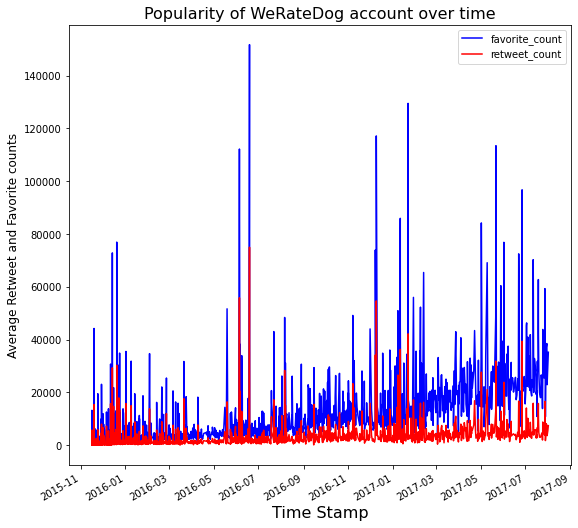

In [73]:
retweet_popularity = twitter_archive_master.groupby("timestamp").retweet_count.mean()
favorite_popularity = twitter_archive_master.groupby("timestamp").favorite_count.mean()
favorite_popularity.plot(color ='b',figsize= (9,9))
retweet_popularity.plot(color ='r',figsize= (9,9))
plt.xlabel('Time Stamp' , fontsize=16)
plt.ylabel('Average Retweet and Favorite counts', fontsize=12)
plt.title('Popularity of WeRateDog account over time', fontsize=16)
plt.legend();

### 5.2 Most common dog breeds in the dataset 

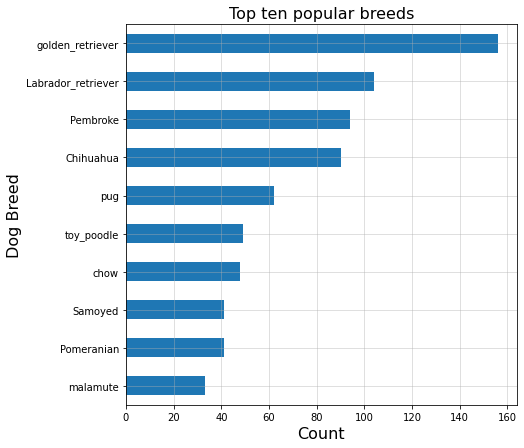

In [74]:
# plot of top ten dog_breeds popular in tweets 
top_breeds = twitter_archive_master['breed'].value_counts().sort_values(ascending=False)[9: : -1]
top_breeds.plot(kind ='barh', figsize= (7,7))
plt.xlabel("Count" , fontsize= 16)
plt.ylabel("Dog Breed", fontsize= 16)
plt.title("Top ten popular breeds", fontsize= 16)
plt.grid(True,alpha = .5);

### 5.3 Top average rating dog breeds

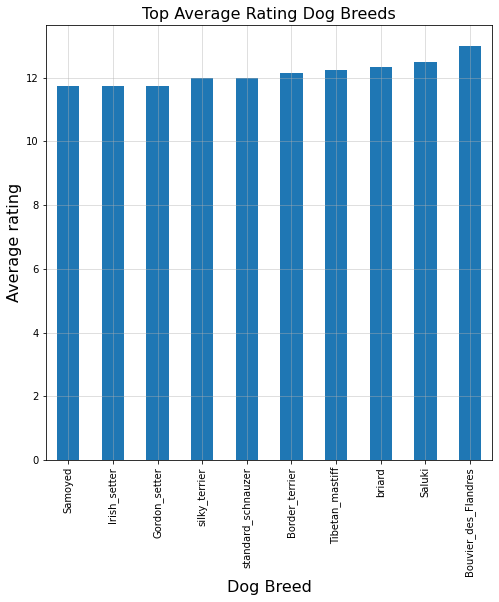

In [75]:
# plot of top ten rating dog breeds
breed_rating = twitter_archive_master.groupby("breed")["rating"].mean().sort_values()[-10 : :1]
breed_rating.plot(kind='bar',figsize=(8,8))
plt.xlabel('Dog Breed', fontsize= 16)
plt.ylabel('Average rating', fontsize= 16)
plt.title('Top Average Rating Dog Breeds', fontsize= 16)
plt.grid(True,alpha = .5);

### 5.4 Lowest average rating dog breeds

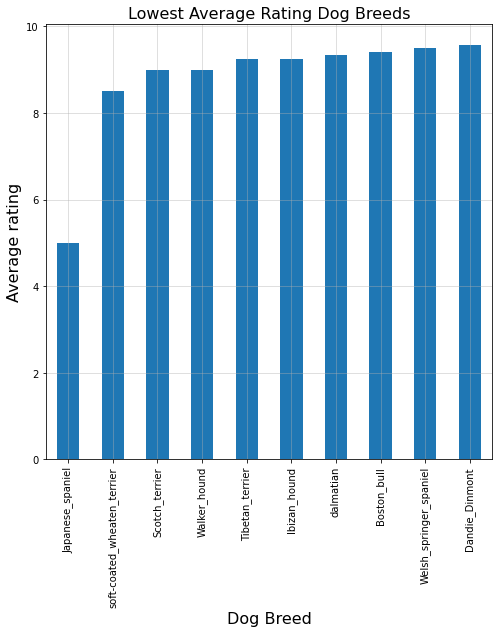

In [76]:
# plot of least ten rating dog breeds
breed_rating = twitter_archive_master.groupby("breed")["rating"].mean().sort_values()[ : 10 : ]
breed_rating.plot(kind='bar',figsize=(8,8))
plt.xlabel('Dog Breed', fontsize= 16)
plt.ylabel('Average rating', fontsize= 16)
plt.title('Lowest Average Rating Dog Breeds', fontsize= 16)
plt.grid(True,alpha = .5);

### 5.5 Top total reactions (retweet & favorite) count  dog breeds

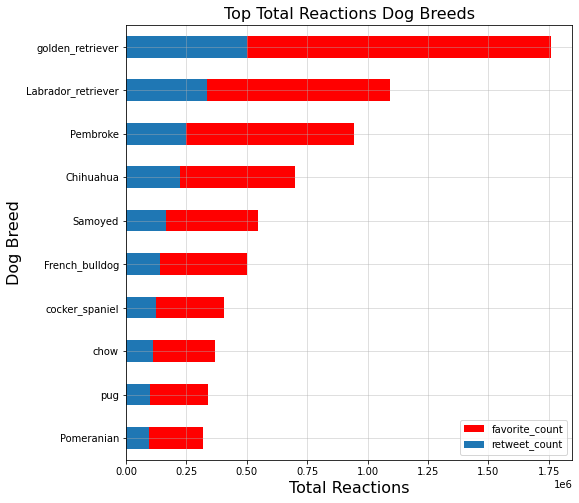

In [77]:
# Plot of top dog breeds against sum of retweets and favorites they got
total_retweets = twitter_archive_master.groupby('breed')['favorite_count'].sum().sort_values(ascending=False)[9::-1]
total_retweets.plot(kind ='barh' ,color='r',figsize=(8,8))

total_retweets = twitter_archive_master.groupby('breed')['retweet_count'].sum().sort_values(ascending=False)[9::-1]
total_retweets.plot(kind ='barh' ,figsize=(8,8))

plt.xlabel('Total Reactions', fontsize= 16)
plt.ylabel('Dog Breed', fontsize= 16)
plt.title('Top Total Reactions Dog Breeds', fontsize= 16)
plt.grid(True,alpha = .5)
plt.legend();

### 5.6 Top average reactions count dog breeds 

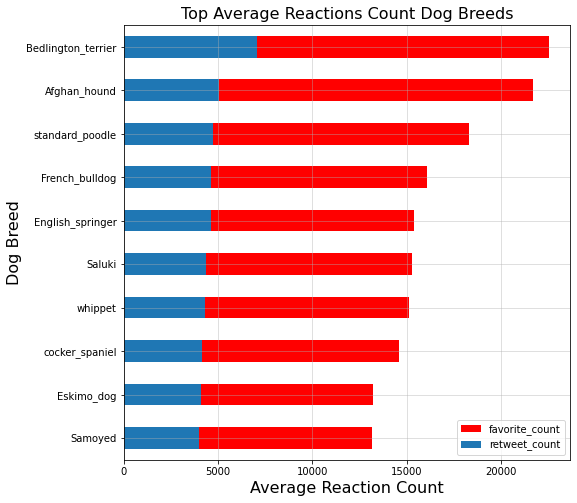

In [78]:
# Plot of top dog breeds against average of retweets and favorites they got
breed_favorite = twitter_archive_master.groupby('breed').favorite_count.mean().sort_values(ascending = False)[9: :-1]
breed_favorite.plot(kind ='barh' ,color ='r',figsize=(8,8))

breed_retweet = twitter_archive_master.groupby('breed').retweet_count.mean().sort_values(ascending = False)[9: :-1]
breed_retweet.plot(kind ='barh' ,figsize=(8,8))

plt.xlabel('Average Reaction Count', fontsize= 16)
plt.ylabel('Dog Breed', fontsize= 16)
plt.title('Top Average Reactions Count Dog Breeds', fontsize= 16)
plt.grid(True,alpha = .5)
plt.legend();